**CONTEXT:**
- Dataset: red wine quality -> https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
- Input variables (based on physicochemical tests):

    1 - fixed acidity

    2 - volatile acidity

    3 - citric acid

    4 - residual sugar

    5 - chlorides

    6 - free sulfur dioxide

    7 - total sulfur dioxide

    8 - density

    9 - pH

    10 - sulphates

    11 - alcohol

- Output variable (based on sensory data):

    12 - quality (score between 0 and 10)

- Goal: Predict wine's quality 

**Define Analysis Process:** 
1. Define problems

2. Gather Data 

3. Data Cleaning

4. Data Process 

5. Exploratory data analysis (EDA)

6. Build model 

7. Conclusion 

In [5]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Define problems

- Predict wine's quality -> classification problems -> binominal logistics regression (good wine & bad wine), multinominal logistics regression (0 - 10)

# 2. Gather Data

In [78]:
df_wine = pd.read_csv("/content/drive/MyDrive/CV/Data analysis projects/data/winequality-red.csv")

In [79]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Data Cleaning

In [80]:
# Overview data
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
df_wine.shape

(1599, 12)

In [82]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Noted:
- Data have 12 features: 11 float, 1 int
- Non null values 

-> No need cleaning

In [83]:
df_wine.columns = df_wine.columns.str.replace(' ','_')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 4. EDA 

## Identify Variable

In [84]:
output_var = 'quality'
input_var = [x for x in df_wine.columns if x != output_var]
print(output_var)
print(input_var)

quality
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## 4.1 Univariate Analysis

### Input numerical

In [85]:
df_input_num = df_wine[input_var]
df_input_num.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [86]:
df_input_num.describe(include= 'all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [87]:
def analyze_central_tendency(df):
    for feature in df.columns:
        print('{feature}: \n mean: {mean} \n median: {median} \n max: {max} \n min: {min} \
            \n 1st quantile: {st} \n 3rd quantile: {rd}'.format(feature=feature, mean=df[feature].mean(), median=df[feature].median()
            ,max=df[feature].max(), min=df[feature].min(), st=df[feature].quantile(0.25), rd=df[feature].quantile(0.75)))       
        print(''.center(20,"="))
def analyze_disperion(df):
    for feature in df.columns:
        print('{feature}: \t std: {std} \t skewness: {skew} \t kurtosis: {kurto}'.format(feature=feature,std=round(df[feature].std(),2),skew=round(df[feature].skew(),2),kurto=round(df[feature].kurtosis(),2)))       
        print(''.center(20,"="))
def visualize_dist_plot(df):
    print(analyze_disperion(df))
    for feature in df.columns:
        plt.title(feature.capitalize(), fontdict={"weight":"bold"})
        sns.histplot(df[feature],kde=True)
        plt.show()

In [88]:
analyze_central_tendency(df_input_num)

fixed_acidity: 
 mean: 8.31963727329581 
 median: 7.9 
 max: 15.9 
 min: 4.6             
 1st quantile: 7.1 
 3rd quantile: 9.2
volatile_acidity: 
 mean: 0.5278205128205128 
 median: 0.52 
 max: 1.58 
 min: 0.12             
 1st quantile: 0.39 
 3rd quantile: 0.64
citric_acid: 
 mean: 0.2709756097560976 
 median: 0.26 
 max: 1.0 
 min: 0.0             
 1st quantile: 0.09 
 3rd quantile: 0.42
residual_sugar: 
 mean: 2.53880550343965 
 median: 2.2 
 max: 15.5 
 min: 0.9             
 1st quantile: 1.9 
 3rd quantile: 2.6
chlorides: 
 mean: 0.08746654158849279 
 median: 0.079 
 max: 0.611 
 min: 0.012             
 1st quantile: 0.07 
 3rd quantile: 0.09
free_sulfur_dioxide: 
 mean: 15.874921826141339 
 median: 14.0 
 max: 72.0 
 min: 1.0             
 1st quantile: 7.0 
 3rd quantile: 21.0
total_sulfur_dioxide: 
 mean: 46.46779237023139 
 median: 38.0 
 max: 289.0 
 min: 6.0             
 1st quantile: 22.0 
 3rd quantile: 62.0
density: 
 mean: 0.9967466791744841 
 median: 0.99675 
 m

In [89]:
analyze_disperion(df_input_num)

fixed_acidity: 	 std: 1.74 	 skewness: 0.98 	 kurtosis: 1.13
volatile_acidity: 	 std: 0.18 	 skewness: 0.67 	 kurtosis: 1.23
citric_acid: 	 std: 0.19 	 skewness: 0.32 	 kurtosis: -0.79
residual_sugar: 	 std: 1.41 	 skewness: 4.54 	 kurtosis: 28.62
chlorides: 	 std: 0.05 	 skewness: 5.68 	 kurtosis: 41.72
free_sulfur_dioxide: 	 std: 10.46 	 skewness: 1.25 	 kurtosis: 2.02
total_sulfur_dioxide: 	 std: 32.9 	 skewness: 1.52 	 kurtosis: 3.81
density: 	 std: 0.0 	 skewness: 0.07 	 kurtosis: 0.93
pH: 	 std: 0.15 	 skewness: 0.19 	 kurtosis: 0.81
sulphates: 	 std: 0.17 	 skewness: 2.43 	 kurtosis: 11.72
alcohol: 	 std: 1.07 	 skewness: 0.86 	 kurtosis: 0.2


fixed_acidity: 	 std: 1.74 	 skewness: 0.98 	 kurtosis: 1.13
volatile_acidity: 	 std: 0.18 	 skewness: 0.67 	 kurtosis: 1.23
citric_acid: 	 std: 0.19 	 skewness: 0.32 	 kurtosis: -0.79
residual_sugar: 	 std: 1.41 	 skewness: 4.54 	 kurtosis: 28.62
chlorides: 	 std: 0.05 	 skewness: 5.68 	 kurtosis: 41.72
free_sulfur_dioxide: 	 std: 10.46 	 skewness: 1.25 	 kurtosis: 2.02
total_sulfur_dioxide: 	 std: 32.9 	 skewness: 1.52 	 kurtosis: 3.81
density: 	 std: 0.0 	 skewness: 0.07 	 kurtosis: 0.93
pH: 	 std: 0.15 	 skewness: 0.19 	 kurtosis: 0.81
sulphates: 	 std: 0.17 	 skewness: 2.43 	 kurtosis: 11.72
alcohol: 	 std: 1.07 	 skewness: 0.86 	 kurtosis: 0.2
None


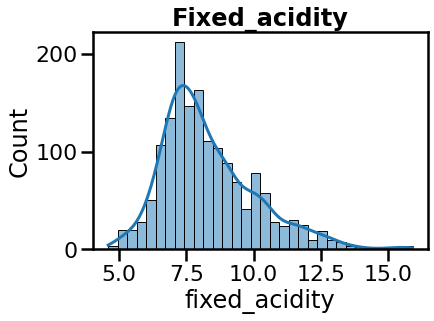

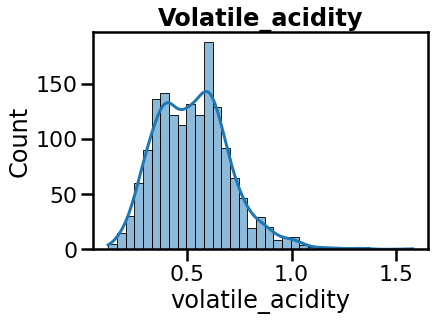

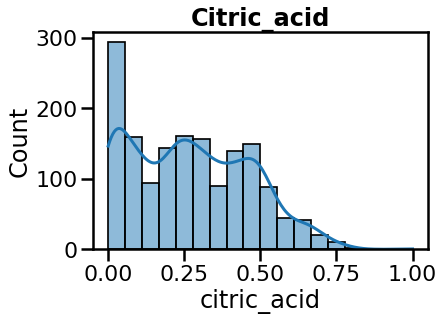

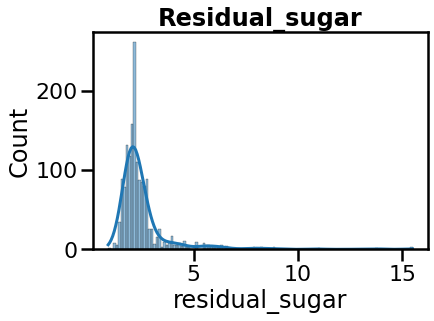

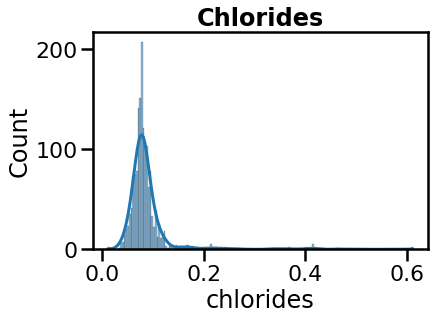

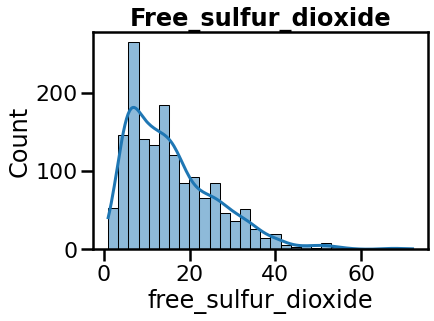

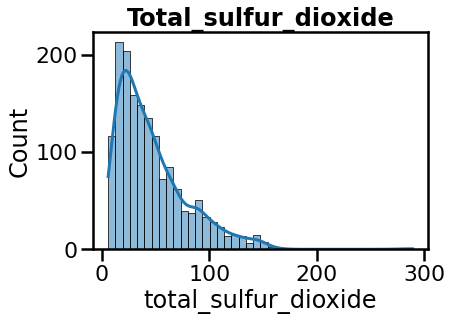

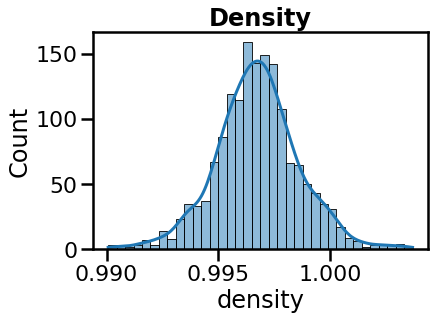

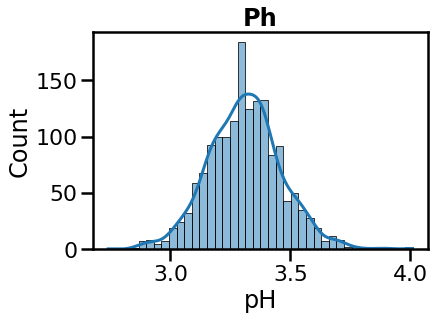

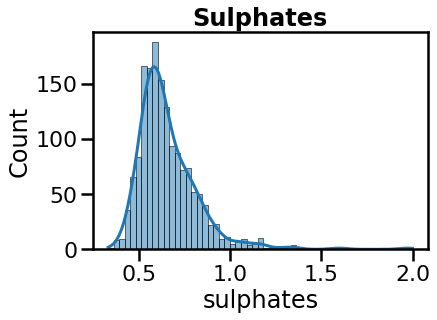

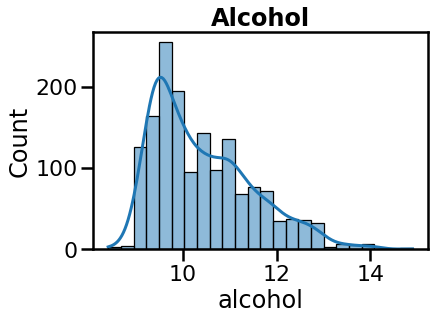

In [90]:
visualize_dist_plot(df_input_num)

- All have different scale -> need to scaled data
- Citric acid not normally distributed
- Residual sugar, chlorides, Total sulfur dioxide have large outliers 

### Output numerical

In [91]:
df_wine[output_var].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

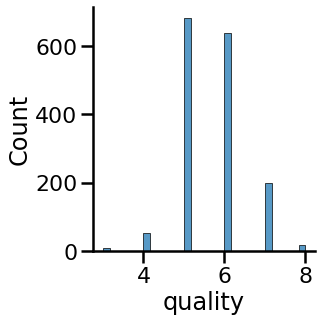

In [92]:
sns.displot(df_wine[output_var])
plt.show()

More than 70% of data are 5 - 6

## 4.2 Binary Analysis

### Num Input & Num Input

In [93]:
import sys
sys.path.append('/content/drive/MyDrive/CV/Data analysis projects/')

In [94]:
from analyzer import Analyzer 
_analyze = Analyzer()

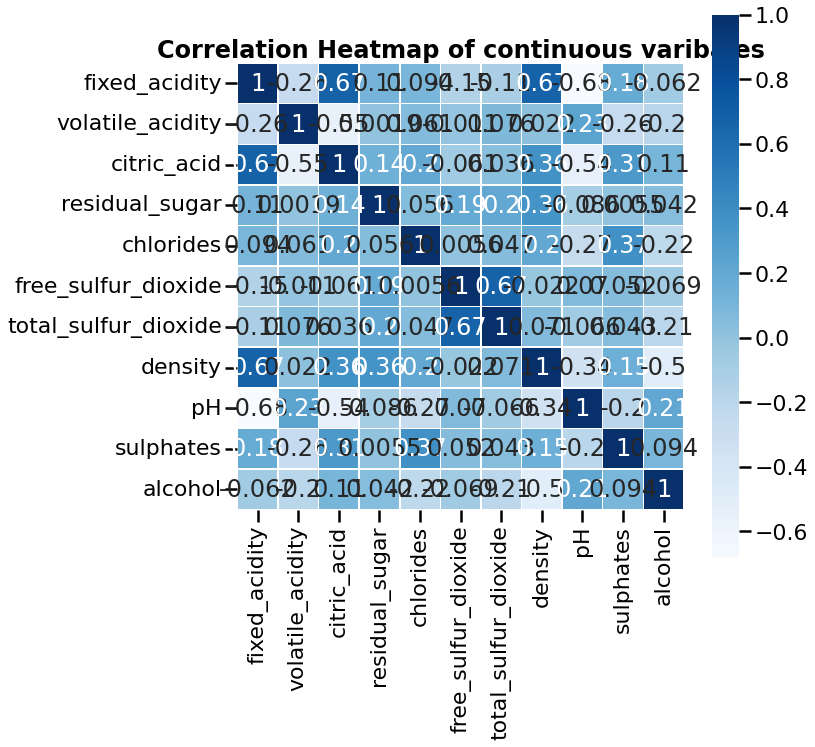

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data = df_input_num.corr(),
    cmap = 'Blues',
    annot = True,
    linewidths = 0.5,
    square = True
)
plt.title('Correlation Heatmap of continuous varibales', fontdict={'weight':'bold'})
plt.show()

- High correlation pairs (>=0.5) -> Try to see if we can combine these pairs into a new feature
    - fixed acidity & ctric acid -> citric acid is a kind of fixed acidity -> since there are 4 popular predominant fixed acids found in wines are tartaric, malic, citric, and succinic. But our data only have citric acid -> drop citric acid 
    - fixed acidity & density  
    - free sulfur dioxide & total sulfur dioxide -> add to wine because of its anti-oxidation and preservation properties. Values > 10mg/L can be toxic. Total sulfur dioxde = free + reacted -> add a new feature "reacted sulfur dioxide" or drop free_sulfur_dioxide, keeping only total_sulfur_dioxide
    - density & alcohol -> alcohol is less dense than water, as the yeast consumes the sugar in the wine, the less dense the wine is -> should be at or slightly less than 1. 
    - volatile acidity & citric acid 
    - citric acid & pH
- Average correlation pairs (0.25 - 0.5):
    - fixed acidity & volatile acidity 
    - volatile acidity & pH
    - volatile acidity & sulphates
    - citric acid & density 
    - citric acid & sulphates
    - residual sugar & density 
    - chlorides & pH
    - chlorides & sulphates
    - density & pH

Wine’s quality is assessed by physicochemical and sensory tests. 

Physicochemical tests include features such as density, alcohol, and pH values. 

Sensory tests are performed by human taste experts.

### Num Input & Ordinal Output

In [96]:
from itertools import product
input_conti_output_ordinal_pairs = list(product(df_input_num.columns,[output_var]))
input_conti_output_ordinal_pairs = [pair for pair in input_conti_output_ordinal_pairs if pair[0] != pair[1]]
input_conti_output_ordinal_pairs 

[('fixed_acidity', 'quality'),
 ('volatile_acidity', 'quality'),
 ('citric_acid', 'quality'),
 ('residual_sugar', 'quality'),
 ('chlorides', 'quality'),
 ('free_sulfur_dioxide', 'quality'),
 ('total_sulfur_dioxide', 'quality'),
 ('density', 'quality'),
 ('pH', 'quality'),
 ('sulphates', 'quality'),
 ('alcohol', 'quality')]

                 sum_sq      df         F    PR(>F)
C(quality)    93.684543     5.0  6.283081  0.000009
Residual    4750.518846  1593.0       NaN       NaN


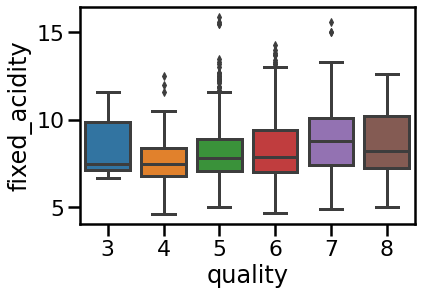

               sum_sq      df          F        PR(>F)
C(quality)   8.223596     5.0  60.913993  3.326465e-58
Residual    43.012083  1593.0        NaN           NaN


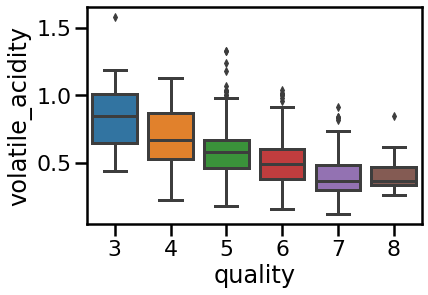

               sum_sq      df          F        PR(>F)
C(quality)   3.529638     5.0  19.690664  4.421092e-19
Residual    57.110441  1593.0        NaN           NaN


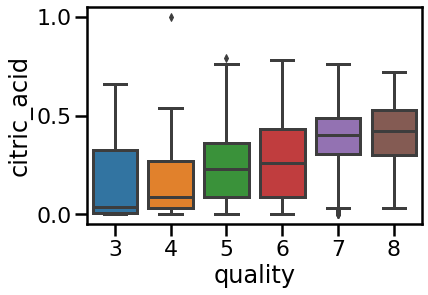

                 sum_sq      df         F    PR(>F)
C(quality)    10.468243     5.0  1.053374  0.384619
Residual    3166.191375  1593.0       NaN       NaN


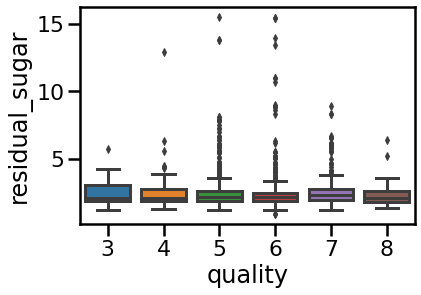

              sum_sq      df         F    PR(>F)
C(quality)  0.065812     5.0  6.035639  0.000015
Residual    3.473986  1593.0       NaN       NaN


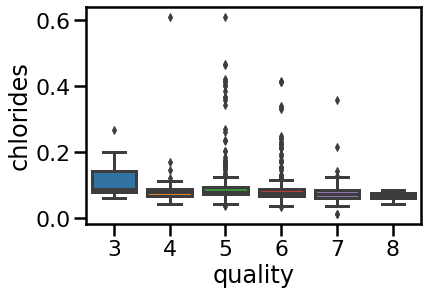

                   sum_sq      df         F    PR(>F)
C(quality)    2570.721913     5.0  4.754233  0.000257
Residual    172274.262452  1593.0       NaN       NaN


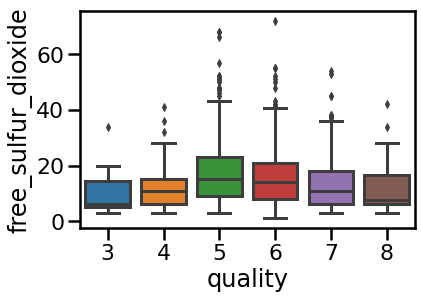

                  sum_sq      df         F        PR(>F)
C(quality)  1.280447e+05     5.0  25.47851  8.533598e-25
Residual    1.601155e+06  1593.0       NaN           NaN


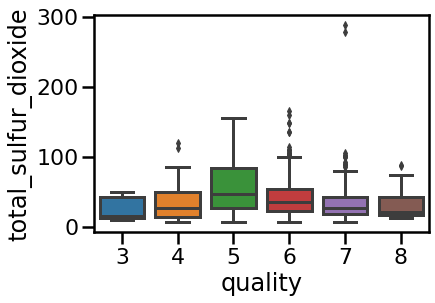

              sum_sq      df          F        PR(>F)
C(quality)  0.000230     5.0  13.396357  8.124395e-13
Residual    0.005462  1593.0        NaN           NaN


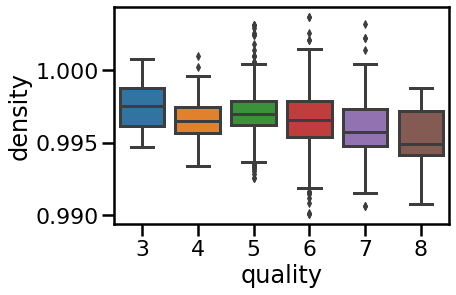

               sum_sq      df         F    PR(>F)
C(quality)   0.512079     5.0  4.341764  0.000628
Residual    37.576539  1593.0       NaN       NaN


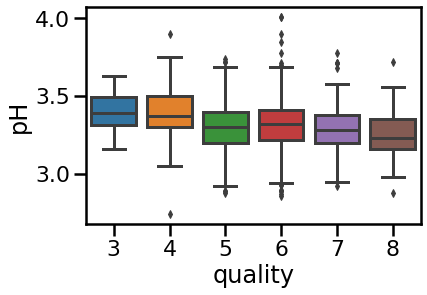

               sum_sq      df          F        PR(>F)
C(quality)   3.000163     5.0  22.273376  1.225890e-21
Residual    42.914557  1593.0        NaN           NaN


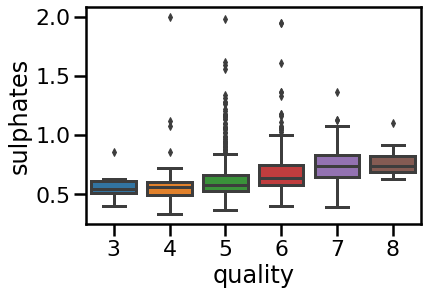

                 sum_sq      df           F         PR(>F)
C(quality)   483.937982     5.0  115.854797  1.209895e-104
Residual    1330.826555  1593.0         NaN            NaN


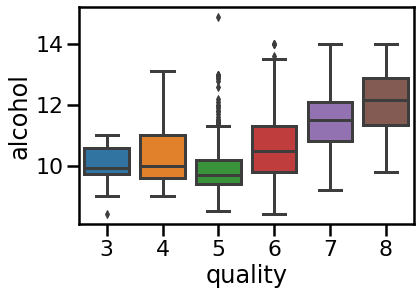

In [97]:
for conti_var, cate_var in input_conti_output_ordinal_pairs:
    _analyze.analyze_anova_table_for_continous_vs_categories(conti_var,cate_var,df_wine)
    _analyze.visualize_box_for_continous_vs_categories(conti_var,cate_var,df_wine)

- Reject H0 -> There's a difference in quality: 
    - fixed_acidity 
    - volatile_acidity
    - citric_acid
    - chlorides
    - free sulfur dioxide
    - total_sulfur_dioxide
    - density
    - pH
    - sulphates
    - alcohol
- Accept H0 -> There's no diffence in quality:
    - residual_sugar

# 5. Data Process

## 5.1 Detect outliers and treatment

### Case 1: Keep all outliers

In [98]:
df_wine_keep_outliers = df_wine.copy()
df_wine_keep_outliers.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
df_wine_keep_outliers.shape

(1599, 12)

### Case 2: Drop all outliers

In [100]:
df_wine_drop_outliers = df_wine.copy()
for var in df_wine_drop_outliers.select_dtypes(include=['float']).columns:
    q1 = df_wine_drop_outliers[var].quantile(0.25)
    q3 = df_wine_drop_outliers[var].quantile(0.75)
    iqr = q3 - q1 
    upper_bound = q3 + iqr*1.5
    lower_bound = q1 - iqr*1.5
    df_wine_drop_outliers.drop(df_wine_drop_outliers[df_wine_drop_outliers[var] >= upper_bound].index,axis=0,inplace=True)
    df_wine_drop_outliers.drop(df_wine_drop_outliers[df_wine_drop_outliers[var] <= lower_bound].index,axis=0,inplace=True)

In [101]:
df_wine_drop_outliers.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
df_wine_drop_outliers.shape

(1135, 12)

## 5.2 Feature Engineering

- Drop features:
    - acid_citric 
    - residual_sugar
    - free_sulfur_dioxide


### Case 1: Keep all features

**Keep-outliers data**

In [103]:
df_wine_keep_outliers_keep_all_features = df_wine_keep_outliers.copy()
df_wine_keep_outliers_keep_all_features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Non-outliers data**

In [104]:
df_wine_drop_outliers_keep_all_features = df_wine_drop_outliers.copy()
df_wine_drop_outliers_keep_all_features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Case 2: Add new features & Drop features

**Keep-outliers data**

In [105]:
# Drop features
df_wine_keep_outliers = df_wine_keep_outliers.drop(columns=['citric_acid','residual_sugar','free_sulfur_dioxide'])
df_wine_keep_outliers.head()

,fixed_acidity,volatile_acidity,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5


**Non-outliers data**

In [106]:
# Drop features
df_wine_drop_outliers = df_wine_drop_outliers.drop(columns=['citric_acid','residual_sugar','free_sulfur_dioxide'])
df_wine_drop_outliers.head()

,fixed_acidity,volatile_acidity,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5


## 5.3 Standardization

- Apply MinMaxScaler for Non-outliers data
- Apply RobustScaler for Keep-outliers data

### Keep-outliers Data: RobustScaler

#### Keep all features

In [107]:
scaler = RobustScaler()
for var in df_wine_keep_outliers_keep_all_features.columns:
    if var == output_var:
        continue
    else:
        col_name = 'scaled_' + var
        df_wine_keep_outliers_keep_all_features[col_name] = scaler.fit_transform(df_wine_keep_outliers_keep_all_features[[var]])
df_wine_keep_outliers_keep_all_features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,scaled_volatile_acidity,scaled_citric_acid,scaled_residual_sugar,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


#### Add & drop features

In [108]:
scaler = RobustScaler()
for var in df_wine_keep_outliers.columns:
    if var == output_var:
        continue
    else:
        col_name = 'scaled_' + var
        df_wine_keep_outliers[col_name] = scaler.fit_transform(df_wine_keep_outliers[[var]])
df_wine_keep_outliers.head()

,fixed_acidity,volatile_acidity,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,scaled_fixed_acidity,scaled_volatile_acidity,scaled_chlorides,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
0,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5,-0.238095,0.72,-0.15,-0.100,0.469799,1.052632,-0.333333,-0.50
1,7.8,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5,-0.047619,1.44,0.95,0.725,0.022371,-0.578947,0.333333,-0.25
2,7.8,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5,-0.047619,0.96,0.65,0.400,0.111857,-0.263158,0.166667,-0.25
3,11.2,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6,1.571429,-0.96,-0.20,0.550,0.559284,-0.789474,-0.222222,-0.25
4,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5,-0.238095,0.72,-0.15,-0.100,0.469799,1.052632,-0.333333,-0.50


### Non-outliers Data: MinMaxScaler

#### Keep all features

In [109]:
scaler = MinMaxScaler()
for var in df_wine_drop_outliers_keep_all_features.columns:
    if var == output_var:
        continue
    else:
        col_name = 'scaled_' + var
        df_wine_drop_outliers_keep_all_features[col_name] = scaler.fit_transform(df_wine_drop_outliers_keep_all_features[[var]])
df_wine_drop_outliers_keep_all_features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,scaled_volatile_acidity,scaled_citric_acid,scaled_residual_sugar,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.655367,0.000000,0.291667,0.459459,0.256410,0.261682,0.668367,0.757143,0.377049,0.162791
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.858757,0.000000,0.583333,0.756757,0.615385,0.570093,0.540816,0.314286,0.573770,0.255814
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.723164,0.054795,0.458333,0.675676,0.358974,0.448598,0.566327,0.400000,0.524590,0.255814
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.180791,0.767123,0.291667,0.445946,0.410256,0.504673,0.693878,0.257143,0.409836,0.255814
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.655367,0.000000,0.291667,0.459459,0.256410,0.261682,0.668367,0.757143,0.377049,0.162791


#### Add & drop features

In [110]:
scaler = MinMaxScaler()
for var in df_wine_drop_outliers.columns:
    if var == output_var:
        continue
    else:
        col_name = 'scaled_' + var
        df_wine_drop_outliers[col_name] = scaler.fit_transform(df_wine_drop_outliers[[var]])
df_wine_drop_outliers.head()

,fixed_acidity,volatile_acidity,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,scaled_fixed_acidity,scaled_volatile_acidity,scaled_chlorides,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
0,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5,0.319444,0.655367,0.459459,0.261682,0.668367,0.757143,0.377049,0.162791
1,7.8,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5,0.375000,0.858757,0.756757,0.570093,0.540816,0.314286,0.573770,0.255814
2,7.8,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5,0.375000,0.723164,0.675676,0.448598,0.566327,0.400000,0.524590,0.255814
3,11.2,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6,0.847222,0.180791,0.445946,0.504673,0.693878,0.257143,0.409836,0.255814
4,7.4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5,0.319444,0.655367,0.459459,0.261682,0.668367,0.757143,0.377049,0.162791


# 6. Build model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score

**Prepared Dataset:**
- Keep outliers:
    - df_wine_keep_outliers_keep_features
    - df_wine_keep_outliers
- Drop outliers:
    - df_wine_drop_outliers_keep_features
    - df_wine_drop_outliers


## Keep-outliers Data

### Keep features

In [112]:
X = df_wine_keep_outliers_keep_all_features.select_dtypes(include=['float','int','uint8']).drop(columns=output_var)
y = df_wine_keep_outliers_keep_all_features.quality
print(X.shape)
print(y.shape)

(1599, 22)
(1599,)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1279, 22)
X_test:  (320, 22)
y_train:  (1279,)
y_test:  (320,)


#### Scaled features

In [114]:
choosen_columns = [x for x in X_train.columns if x in X_train.filter(like='scaled').columns]
choosen_columns

['scaled_fixed_acidity',
 'scaled_volatile_acidity',
 'scaled_citric_acid',
 'scaled_residual_sugar',
 'scaled_chlorides',
 'scaled_free_sulfur_dioxide',
 'scaled_total_sulfur_dioxide',
 'scaled_density',
 'scaled_pH',
 'scaled_sulphates',
 'scaled_alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


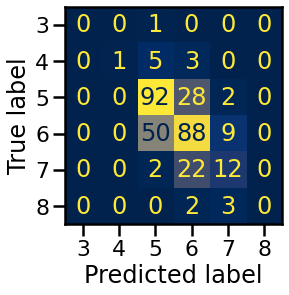

In [115]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [116]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.11      0.20         9
           5       0.61      0.75      0.68       122
           6       0.62      0.60      0.61       147
           7       0.46      0.33      0.39        36
           8       1.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.78      0.30      0.31       320
weighted avg       0.62      0.60      0.59       320



#### Non-Scaled features

In [117]:
choosen_columns = [x for x in X_train.columns if x not in X_train.filter(like='scaled').columns]
choosen_columns

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


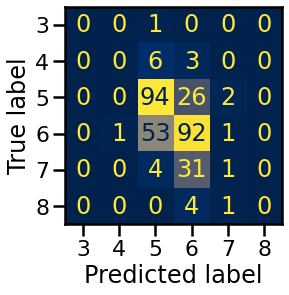

In [118]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [119]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.59      0.77      0.67       122
           6       0.59      0.63      0.61       147
           7       0.20      0.03      0.05        36
           8       1.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.56      0.24      0.22       320
weighted avg       0.54      0.58      0.54       320



### Drop features

In [120]:
X = df_wine_keep_outliers.select_dtypes(include=['float','int','uint8']).drop(columns=output_var)
y = df_wine_keep_outliers.quality
print(X.shape)
print(y.shape)

(1599, 16)
(1599,)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1279, 16)
X_test:  (320, 16)
y_train:  (1279,)
y_test:  (320,)


#### Scaled features

In [122]:
choosen_columns = [x for x in X_train.columns if x in X_train.filter(like='scaled').columns]
choosen_columns

['scaled_fixed_acidity',
 'scaled_volatile_acidity',
 'scaled_chlorides',
 'scaled_total_sulfur_dioxide',
 'scaled_density',
 'scaled_pH',
 'scaled_sulphates',
 'scaled_alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


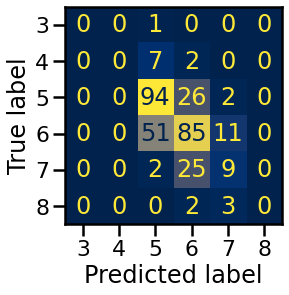

In [123]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [124]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.61      0.77      0.68       122
           6       0.61      0.58      0.59       147
           7       0.36      0.25      0.30        36
           8       1.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.76      0.27      0.26       320
weighted avg       0.60      0.59      0.56       320



#### Non-Scaled features

In [125]:
choosen_columns = [x for x in X_train.columns if x not in X_train.filter(like='scaled').columns]
choosen_columns

['fixed_acidity',
 'volatile_acidity',
 'chlorides',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


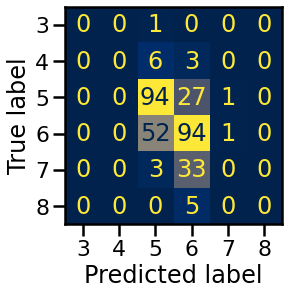

In [126]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [127]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.60      0.77      0.68       122
           6       0.58      0.64      0.61       147
           7       0.00      0.00      0.00        36
           8       1.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.70      0.23      0.21       320
weighted avg       0.54      0.59      0.54       320



## Drop-outliers Data

### Keep features

In [128]:
X = df_wine_drop_outliers_keep_all_features.select_dtypes(include=['float','int','uint8']).drop(columns=output_var)
y = df_wine_drop_outliers_keep_all_features.quality
print(X.shape)
print(y.shape)

(1135, 22)
(1135,)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (908, 22)
X_test:  (227, 22)
y_train:  (908,)
y_test:  (227,)


#### Scaled features

In [130]:
choosen_columns = [x for x in X_train.columns if x in X_train.filter(like='scaled').columns]
choosen_columns

['scaled_fixed_acidity',
 'scaled_volatile_acidity',
 'scaled_citric_acid',
 'scaled_residual_sugar',
 'scaled_chlorides',
 'scaled_free_sulfur_dioxide',
 'scaled_total_sulfur_dioxide',
 'scaled_density',
 'scaled_pH',
 'scaled_sulphates',
 'scaled_alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


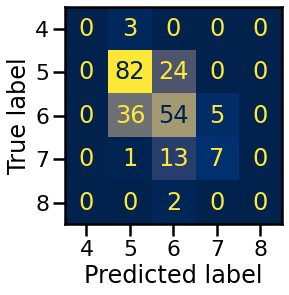

In [131]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [132]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.67      0.77      0.72       106
           6       0.58      0.57      0.57        95
           7       0.58      0.33      0.42        21
           8       1.00      0.00      0.00         2

    accuracy                           0.63       227
   macro avg       0.77      0.34      0.34       227
weighted avg       0.63      0.63      0.62       227



#### Non-Scaled features

In [133]:
choosen_columns = [x for x in X_train.columns if x not in X_train.filter(like='scaled').columns]
choosen_columns

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


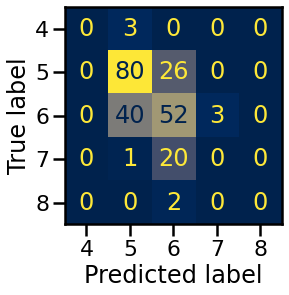

In [134]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [135]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.65      0.75      0.70       106
           6       0.52      0.55      0.53        95
           7       0.00      0.00      0.00        21
           8       1.00      0.00      0.00         2

    accuracy                           0.58       227
   macro avg       0.63      0.26      0.25       227
weighted avg       0.54      0.58      0.55       227



### Drop features

In [136]:
X = df_wine_drop_outliers.select_dtypes(include=['float','int','uint8']).drop(columns=output_var)
y = df_wine_drop_outliers.quality
print(X.shape)
print(y.shape)

(1135, 16)
(1135,)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (908, 16)
X_test:  (227, 16)
y_train:  (908,)
y_test:  (227,)


#### Scaled features

In [138]:
choosen_columns = [x for x in X_train.columns if x in X_train.filter(like='scaled').columns]
choosen_columns

['scaled_fixed_acidity',
 'scaled_volatile_acidity',
 'scaled_chlorides',
 'scaled_total_sulfur_dioxide',
 'scaled_density',
 'scaled_pH',
 'scaled_sulphates',
 'scaled_alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


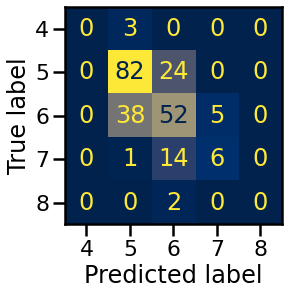

In [139]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [140]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.66      0.77      0.71       106
           6       0.57      0.55      0.56        95
           7       0.55      0.29      0.37        21
           8       1.00      0.00      0.00         2

    accuracy                           0.62       227
   macro avg       0.75      0.32      0.33       227
weighted avg       0.62      0.62      0.60       227



#### Non-Scaled features

In [141]:
choosen_columns = [x for x in X_train.columns if x not in X_train.filter(like='scaled').columns]
choosen_columns

['fixed_acidity',
 'volatile_acidity',
 'chlorides',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


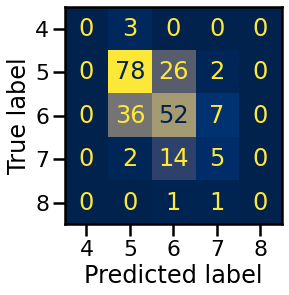

In [142]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train[choosen_columns],y_train)

y_pred = clf.predict(X_test[choosen_columns])

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test[choosen_columns],y_test,cmap='cividis',colorbar=False)

In [143]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.66      0.74      0.69       106
           6       0.56      0.55      0.55        95
           7       0.33      0.24      0.28        21
           8       1.00      0.00      0.00         2

    accuracy                           0.59       227
   macro avg       0.71      0.30      0.30       227
weighted avg       0.59      0.59      0.58       227



# 7. Conclusion

- Chọn model drop features và scaled values để dự báo chất lượng rượu vang do có accuracy cao = 63%. Các label 4,8 không thể dự đoán do có lượng dữ liệu ít.